# <center>3ª Atividade de Aprendizado de Máquina</center>
# <center>Modelos Preditivos</center>
### <center><b><i>Anderson Martins Gomes</i></b></center>
## <center>Programa de Pós-graduação em Ciência da Computação - PPGCC/UECE</center>
### <center><i>andersonmg@gmail.com</i></center>

## <center><b>Resumo</b></center>
<p style="margin-left: 50px; margin-right: 50px; text-align: justify">Neste trabalho são realizados experimentos de redução de dimensionalidade com a base de dados <i>UCI Machine Learning Repository: Wine Quality Data Set</i>. Esse conjunto apresenta informações relacionadas à qualidade de vinhos brancos e tintos. Na análise, optou-se exclusivamente pelo subconjunto dos vinhos tintos. Nos testes implementou-se o algoritmo PCA, com o cálculo da matriz de covariância, dos autovalores, dos autovetores e da variância explicada. Além disso, foram realizados experimentos em três imagens, aplicando-se a redução de dimensionalidade em cada uma delas. Por fim, foi realizado um comparativo com outro algoritmo de redução de dimensionalidade, o LDA. Trabalho inserido no âmbito da disciplina de Aprendizado de Máquina, professora Ana Luiza Bessa, Programa de Pós-graduação em Ciência da Computação, Universidade Estadual do Ceará.</p>


# <b>1. Introdução</b>
<p style="text-align: justify; text-indent:50px;">A denominada redução de dimensionalidade é técnica comumente aplicada em problemas que apresentam elevado número de atributos. É o caso clássico de aplicações de reconhecimento/processamento de imagens. O objetivo da técnica é representar o conjunto de dados com um menor número de variáveis, de forma a reduzir os custos computacionais e melhorar o desempenho do modelo induzido. Tal necessidade advém do problema da "maldição da dimensionalidade", que se trata justamente do aumento exponencial da variedade de objetos necessários ao treinamento a partir do número excessivo de variáveis independentes.
</p>
<p style="text-align: justify; text-indent:50px;">
O foco deste trabalho é um algoritmo de redução de dimensionalidade bastante popular, o <i>Principal Component Analysis</i>, mais conhecido pela sigla PCA. Sua implementação baseia-se na ideia de obter a correlação estatísticas das observações, reduzindo a dimensionalidade do conjunto de dados original por meio da combinação das variáveis originais.
</p>
<p style="text-align: justify; text-indent:50px;">
Conforme comandos das questões, buscou-se a implementação do PCA por meio do cálculo da matriz de covariância, dos autovalores, dos autovetores e da variância explicada. Além disso, foram realizados experimentos em três imagens, aplicando-se a redução de dimensionalidade em cada uma delas. Por fim, foi realizado um comparativo com outro algoritmo de redução de dimensionalidade, o LDA.
</p>

# <b>2. Redução de Dimensionalidade</b>
<p style="text-align: justify; text-indent:50px;">Redução de dimensionalidade é o processo por meio do qual se busca a transformação de um espaço para outro com menor dimensão, de forma a manter o valor intríseco dos dados o mais próximo possível do original. </p>
<p style="text-align: justify; text-indent:50px;">As técnicas para reduzir a dimensionalidade de modelos podem ser divididas em duas grandes categorias, a saber: agregação e seleção de atributos. Na primeira, ocorre a substituição de atributos, condensando-se mais de um deles em uma espécie de "variável resumo" que, com certo nível de perda, representa aquele conjunto de dados. Já a seleção de atributos se ocupa em identificar o sub-conjunto ótimo das variáveis independentes, de forma a eliminar <i>features</i> redundantes ou desnecessárias.
</p>
<p style="text-align: justify; text-indent:50px;">A redução de dimensionalidade é importante para o aprendizado de máquina porque permite tornar "tratáveis" problemas envolvendo um grande espaço vetorial. Ou seja, torna mais viável computacionalmente a execução de um modelo quando este é substituído por outro com um menor número de variáveis.</p>

# <b>3. PCA (Principal Component Analysis)</b>
<p style="text-align: justify; text-indent:50px;">O PCA é um método clássico de redução de dimensionalidade que provê uma sequência de melhores aproximações lineares do espaço de variáveis original. Assim, transforma um número de variáveis possivelmente correlacionadas em um novo sistema de coordenadas com um número menor de variáveis não correlacionadas chamadas componentes principais, enquanto mantém o tanto quanto possível da variabilidade nos dados originais.</p>
<p style="text-align: justify; text-indent:50px;">Para tal, calcula-se a matriz de correlação do conjunto de dados original. A partir dela, são decompostos os autovetores e os autovalores. Os autovetores dão as direções da nova base na qual a matriz de covariância é diagonal. Já os autovalores correspondem ao valor escalar que os autovetores correspondente são escalonados na transformação linear.</p>
<p style="text-align: justify; text-indent:50px;">Os autovalores dão a variância explicada do autovetor correspondente. Ordenando-se os autovetores em ordem descrescente de acordo
com os autovalores, pode-se ordenar as components principais por ordem de importância, e eventualmente remover as associadas com uma variância pequena.</p>

# <b>4. Variância Explicada</b>
<p style="text-align: justify; text-indent:50px;">O objetivo do PCA é obter a maior variância por meio do menor número de dimensões. Após a decomposição da matriz de correlação, tem-se na soma do autovalores ordenados a variância total dos autovetores correspondentes.</p>
<p style="text-align: justify; text-indent:50px;">Ou seja, variância explicada refere-se à medida da proporção na qual um modelo matemático contabiliza a variância de um dado conjunto de dados.</p>
<p style="text-align: justify; text-indent:50px;">Conforme essa proporção se aproxima de 100%, tem-se a possibilidade de selecionar as melhores dimensões, descartando-se as demais.</p>

# <b>5. Método de Redução de Dimensionalidade para Comparação</b>
<p style="text-align: justify; text-indent:50px;">Para este trabalho, optou-se por se utilizar o LDA, Linear Discriminant Analysis, para fins de comparação com o PCA. O LDA é definido, na maioria das vezes, como um algoritmo de extração de <i>features</i> supervisionado. Todavia, alguns autores sustentam que o LDA pode ser utilizado como um classificador linear.</p>
<p style="text-align: justify; text-indent:50px;">Assim como o PCA, o LDA procura combinações lineares de variáveis que melhor explicam os dados. O LDA tenta explicitamente modelar a diferença entre as classes de dados. O PCA, por outro lado, não leva em consideração nenhuma diferença de classe, obtendo as combinações de recursos com base em diferenças em vez de semelhanças.</p>
<p style="text-align: justify; text-indent:50px;">O LDA sempre gera um número de <i>features</i> menor que o número de classes. Logo, em problemas de classificação binária o método gera apenas uma variável, independentemente do número de dimensões do <i>dataset</i> original.</p>

# <b>6. Metodologia</b>
<p style="text-align: justify; text-indent:50px;">Para implementação dos experimentos, optou-se pela linguagem Python. Assim, foram utilizadas as bibliotecas bases da linguagem para o algoritmo PCA e o scikit-learn para comparação com o LDA. </p>

# <b>7. Resultados</b>


<p style="text-align: justify; text-indent:50px;">Carregando a base de dados e exibindo alguma informações básicas sobre o <i>dataset</i>:</p>

In [1]:
import ds_utils as util
dsWineRed = util.getDSWine_RED()
dsWineRed.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [2]:
dsWineRed.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
dsWineRed.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


---
## 1. Construção e Execução dos Modelos
#### O objetivo desse trabalho é construir, executar, avaliar e comparar cinco modelos preditivos vistos na disciplina de Aprendizado de Máquina, sendo eles: KNN, Naive Bayes, Arvore de Decisão, MLP e SVM. A seguir são paresentadas as diretrizes para a construção e execução de cada um.
### • Execute o algoritmo KNN
#### – Utilize, pelos menos, três diferentes valores de K
#### – Utilize, pelos menos, três diferentes métricas de distâncias
### • Execute o algoritmo Naive Bayes com três diferentes tipos de distribuição de dados:
#### – Gaussiano
#### – Multinomial
#### – Bernoulli
### • Execute o algoritmo Árvore de Decisão
#### – Utilize índice Gini e Entropia para o cálculo de qualidade da divisão dos nós
#### – Discuta estratégias de poda que podem ser utilizadas nos seus modelos
### • Execute o algoritmo MLP, considerando:
#### – Utilização de diferentes valores de taxa de aprendizagem
#### – Utilização de diferentes valores de termo momentum
### • Execute o algoritmo SVM, considerando:
#### – Utilização de pelo menos três diferentes tipos de kernel:
### • Linear
### • RBF com diferentes larguras
### • Polinomial com diferntes graus
#### – Analise a utilização de diferentes valores para os parâmetros C e Gamma.
### OBS: Utilize, sempre que possível, Validação Cruzada.
---

<p style="text-align: justify; text-indent:50px;">
Para a execução dos algoritmos, utilizou-se uma biblioteca de AutoML construída pelo aluno ao longo da disciplina (GOMES, 2021). Em linhas gerais, a biblioteca encapsula as funções básicas de preparação do <i>dataset</i>, <i>features engineering</i> e otimização de hiper-parâmetros. 
</p>
<p style="text-align: justify; text-indent:50px;">
Assim, a biblioteca se encarrega de executar as combinações entre o conjunto de features, o conjunto de algoritmos e de hiper-parâmetros, entregando os resultados conforme as métricas que forem definidas para o problema.
</p>
<p style="text-align: justify; text-indent:50px;">
Na sequência deste trabalho, serão detalhadas as principais funções da biblioteca de AutoML utilizadas para atendimento das questões.
</p>

In [4]:
from autoML import AutoML
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

#Definição dos classificadores conforme especificação do trabalho
ALGORITHMS = {
    KNeighborsClassifier(n_jobs=-1):{
        "n_neighbors": [3,11,17], #Utilizando três diferentes valores de K
        "metric": ['euclidean', 'manhattan', 'minkowski'] #Utilizando três diferentes métricas de distâncias
        },
    GaussianNB():{ #Naive Bayes com distribuição gaussiana
        "priors": [None], #Não há variação de parâmetros para este algoritmo
        },
    MultinomialNB():{ #Naive Bayes com distribuição multinomial
        "alpha": [1.0], #Não há variação de parâmetros para este algoritmo
        },
    BernoulliNB():{ #Naive Bayes com distribuição Bernoulli
        "alpha": [1.0], #Não há variação de parâmetros para este algoritmo
        },
    DecisionTreeClassifier():{
        "criterion": ["gini", "entropy"], #Utilizando índice Gini e Entropia para o cálculo de qualidade da divisão dos nós
        },
    MLPClassifier():{
        "learning_rate": ['constant', 'invscaling', 'adaptive'], #Utilizando diferentes valores de taxa de aprendizagem
        'momentum' : [0.1, 0.5, 0.9], #Utilizando diferentes valores de momentum
        },        
    SVC(probability=True):{
        "kernel": ['linear', 'rbf', 'poly'], #Utilizando diferentes kernels
        "C": [0.001, 1, 1000], #Utilizando diferentes valores de C
        "gamma": ["auto", "scale"], #Utilizando diferentes valores de gamma
        "degree": [1, 3, 5], #Utilizando diferentes valores de grau
        },
}

ALGORITHMS = {
    KNeighborsClassifier(n_jobs=-1):{
        "n_neighbors": [3,11,17], #Utilizando três diferentes valores de K
        "metric": ['euclidean', 'manhattan', 'minkowski'] #Utilizando três diferentes métricas de distâncias
        },
}

METRICS = ['accuracy', 'f1', 'precision', 'recall', 'roc_auc'] #Definição das métricas utilizadas

#Definição do objeto AutoML
automl = AutoML(dsWineRed
                , y_colname='quality' 
                , algorithms=ALGORITHMS
                , ds_name='espec_prof'
                , metrics=METRICS
                , ngen=1 #Número de gerações do algoritmo genético que otimiza a busca pela melhor combinação de features/algoritmos
                , features_engineering=False #Não fazer features engineering (usará todas as features do dataset)
                , grid_search=True #Utilizar grid search em vez de Bayesian optimization
                )

automl.getResults_4Print()

Original dataset dimensions: (1599, 12)
Dataset dimensions after drop NaN values: (1599, 12)
ML problem type: Classification
   Applied metrics: ['balanced_accuracy', 'f1_weighted', 'precision_weighted', 'recall_weighted', 'roc_auc_ovr_weighted']
Normalizing the variables...
Splitting dataset...
   X_train dimensions: (1279, 11)
Selected algorithms: ['KNeighborsClassifier']
Nº of training possible combinations: 4094.0 (4094.0 features combinations, 1 algorithms)
   *Model trained: balanced_accuracy = 0.33236 | KNeighborsClassifier | 11 features | {'metric': 'euclidean', 'n_neighbors': 3
   *Model trained: balanced_accuracy = 0.29257 | KNeighborsClassifier | 11 features | {'metric': 'euclidean', 'n_neighbors': 11
   *Model trained: balanced_accuracy = 0.29638 | KNeighborsClassifier | 11 features | {'metric': 'euclidean', 'n_neighbors': 17
   *Model trained: balanced_accuracy = 0.33056 | KNeighborsClassifier | 11 features | {'metric': 'manhattan', 'n_neighbors': 3
   *Model trained: bala

,algorithm,params,features,train_time,predict_time,mem_max,balanced_accuracy,f1_weighted,precision_weighted,recall_weighted,roc_auc_ovr_weighted
0,KNeighborsClassifier,"{'metric': 'euclidean', 'n_neighbors': 3}","11: 'fixed acidity', 'volatile acidity', 'citr...",0.003494,0.000301,1423.527344,0.332356,0.613640,0.612325,0.618750,0.767009
1,KNeighborsClassifier,"{'metric': 'minkowski', 'n_neighbors': 3}","11: 'fixed acidity', 'volatile acidity', 'citr...",0.003407,0.000309,1423.664062,0.332356,0.613640,0.612325,0.618750,0.767009
2,KNeighborsClassifier,"{'metric': 'manhattan', 'n_neighbors': 3}","11: 'fixed acidity', 'volatile acidity', 'citr...",0.003772,0.000332,1423.921875,0.330563,0.618309,0.619355,0.621875,0.772007
3,KNeighborsClassifier,"{'metric': 'manhattan', 'n_neighbors': 11}","11: 'fixed acidity', 'volatile acidity', 'citr...",0.003347,0.000348,1423.750000,0.318322,0.609818,0.628779,0.625000,0.764780
4,KNeighborsClassifier,"{'metric': 'minkowski', 'n_neighbors': 17}","11: 'fixed acidity', 'volatile acidity', 'citr...",0.003448,0.000293,1424.035156,0.296385,0.610754,0.612748,0.634375,0.782788
5,KNeighborsClassifier,"{'metric': 'euclidean', 'n_neighbors': 17}","11: 'fixed acidity', 'volatile acidity', 'citr...",0.003610,0.000314,1423.921875,0.296385,0.610754,0.612748,0.634375,0.782788
6,KNeighborsClassifier,"{'metric': 'minkowski', 'n_neighbors': 11}","11: 'fixed acidity', 'volatile acidity', 'citr...",0.003425,0.000292,1423.867188,0.292570,0.585560,0.580224,0.603125,0.766902
7,KNeighborsClassifier,"{'metric': 'euclidean', 'n_neighbors': 11}","11: 'fixed acidity', 'volatile acidity', 'citr...",0.003179,0.000400,1423.656250,0.292570,0.585560,0.580224,0.603125,0.766902
8,KNeighborsClassifier,"{'metric': 'manhattan', 'n_neighbors': 17}","11: 'fixed acidity', 'volatile acidity', 'citr...",0.003321,0.000349,1423.921875,0.290334,0.596732,0.587198,0.618750,0.767973


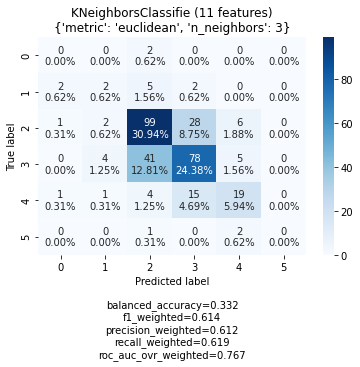

In [5]:
automl.getBestConfusionMatrix();

## 2. Avaliação dos Modelos
#### Avalie cada um dos modelos construídos e executados na seção anterior, da seguinte forma:
### • Calcule as métricas:
#### – Acurácia
#### – Precisão
#### – Recall
#### – F-Score
### • Realize Análise ROC
---

---
### 3. Escolha um dos métodos de redução de dimensionalidade do artigo apresentado em sala de aula e faça uma comparação com a técnica PCA. Para basear sua análise, utilize, sempre que possível, os resultados obtidos nessa atividade.
---

# <b>Referências</b>
* GOMES, A.M. <b>Experimental Automl library, which uses genetic algorithm, multiprocessing and hyper-parameter optimization to solve supervised learning problems</b>. Disponível em <https://github.com/andersonmgomes/automl>. Acesso em: 20 dez. 2021.
* Mitchell, Tom. Machine learning. McGraw-Hill, 1997.
* Carvalho, André, et al. Inteligência Artificial–uma abordagem de aprendizado de máquina. Rio de Janeiro: LTC, 2011.
* Bruce, Andrew, and Peter Bruce. Estatística Prática para Cientistas de Dados. Alta Books, 2019.
* https://en.wikipedia.org/wiki/Principal_component_analysis
* https://en.wikipedia.org/wiki/Dimensionality_reduction
* Ghodsi, Ali. Dimensionality Reduction A Short Tutorial. 2006.
* R.A. Johnson. Applied Multivariate Statistical Analysis. Prentice Hall, 1992.
* ANOWAR, Farzana, et al. Conceptual and empirical comparison of dimensionality reduction algorithms (PCA, KPCA, LDA, MDS, SVD, LLE, ISOMAP, LE, ICA, t-SNE). Computer Science Review, v. 40, p. 100378, 2021.
* https://en.wikipedia.org/wiki/Linear_discriminant_analysis
* https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html
* https://leandrocl2005.github.io/pca_na_mao_e_no_python/
* https://scikit-learn.org/stable/auto_examples/neighbors/plot_nca_dim_reduction.html#sphx-glr-auto-examples-neighbors-plot-nca-dim-reduction-py

In [6]:
#%load_ext notexbook
#%texify